## **Predicting total and paying public at sports events using Machine Learning**

---
This notebook is part of the article **"Predicting total and paying public at sports events using Machine Learning"**.

In [0]:
#Search the files in your computer if you want to run the codes. If not, skip this part.
#Please upload the Excel and csv files from where it was saved. 
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv
Saving Dataset.xlsx to Dataset.xlsx


# **1º- Getting to know the dataset**
As fist step at every Machine Learning research, it is fundamental to visualize the data to get insights and prepare it for future work. With that in mind, this first session presents graphs and statistics to describe our dataset in order to better understand the problem.

We will fisrt import the Excel file 'Dataset.xlsx' as a pandas DataFrame to visualize the data. Also, we will import the libraries necessary to run this first part.

In [0]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Import the Excel file
data = pd.ExcelFile(r'/content/Dataset.xlsx')

#Parsing Excel Sheet to DataFrame and showing it. 
df = pd.read_excel(data, 'BD')

#Showing the first 5 instances of the Database
print(df.head())

       Hour    WeekDay              Champ  ...  Total   Paying Associates
0  19:30:00     Sunday  Campeonato Gaucho  ...   5029   2932.0     2097.0
1  19:30:00   Thursday  Campeonato Gaucho  ...  10824   5862.0     4962.0
2  19:30:00  Wednesday  Campeonato Gaucho  ...   5895   2420.0     3475.0
3  19:30:00     Sunday  Campeonato Gaucho  ...  22889  13840.0     9049.0
4  18:30:00   Saturday  Campeonato Gaucho  ...   6971   3522.0     3449.0

[5 rows x 19 columns]


Now, it is interesting to get some statistics by calling the info() and describe() functions. Note that there are 209 games recorded on the database, corresponding to six seasons from 2014 to 2019. Also, there is no missing data.

**The features for this problem are:**


*   **Hour:** The hour that the match occured (Format: HH:MM);
*   **WeekDay:** The day of the week that the match occured (From monday to sunday);
*   **Champ:** The championship correspondent to the match;
*   **Phase:** Which fase the macth occured of the championship;
*   **Lineup:** The lineup of the home team (from mostly reserves to titular);
*   **Attrat:** A measurement of the opponent attractiveness;
*   **Rain:** The milimeters of rain that occured;
*   **Temp:** The temperature (ºC) of that day;
*   **Marketing:** The level of advertisement done for the match;
*   **D-6:** The accumulated number of tickets sold 6 days prior to the match day;
*   **D-5:** The accumulated number of tickets sold 5 days prior to the match day;
*   **D-4:** The accumulated number of tickets sold 4 days prior to the match day;
*   **D-3:** The accumulated number of tickets sold 3 days prior to the match day;
*   **D-2:** The accumulated number of tickets sold 2 days prior to the match day;
*   **D-1:** The accumulated number of tickets sold 1 days prior to the match day;
*   **D-0:** The accumulated number of tickets sold on the match day.

**As response variables there are:**

*   **Total:** Total number of spectators of the match;
*   **Paying:** Number of spectators that purchased tickets for the match;
*   **Associates:** Number of spectators that have a club membership of the home team.


**For the current problem, we are interesting to predict the total number of spectators and the number of purchased tickets.**

In [0]:
#Obtaining more information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 19 columns):
Hour          210 non-null object
WeekDay       210 non-null object
Champ         210 non-null object
Phase         210 non-null object
Lineup        210 non-null object
Attrat        210 non-null object
Rain          210 non-null float64
Temp          210 non-null float64
Marketing     210 non-null object
D-6           210 non-null int64
D-5           210 non-null int64
D-4           210 non-null int64
D-3           210 non-null int64
D-2           210 non-null int64
D-1           210 non-null int64
D-0           210 non-null int64
Total         210 non-null int64
Paying        210 non-null float64
Associates    210 non-null float64
dtypes: float64(4), int64(8), object(7)
memory usage: 31.3+ KB


,Rain,Temp,D-6,D-5,D-4,D-3,D-2,D-1,D-0,Total,Paying,Associates
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,5.638952,22.402381,1558.757143,2525.685714,3726.233333,5036.366667,6898.585714,8609.490476,12357.771429,24189.280952,12542.404318,11629.714730
std,19.067576,5.943413,4448.069560,5490.957973,6488.210183,7208.001433,7992.966235,8434.288719,8156.984648,13258.569799,8147.437106,6043.530416
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,51.000000,94.000000,428.000000,2944.000000,428.000000,2097.000000
25%,0.000000,18.000000,0.000000,64.000000,226.500000,596.750000,1304.250000,2231.500000,5691.500000,13683.000000,5836.500000,7484.000000
50%,0.000000,22.000000,25.500000,237.500000,820.500000,1555.500000,3087.000000,4669.000000,9588.000000,20223.500000,9875.000000,9783.500000
75%,1.660000,26.375000,392.750000,1224.500000,3104.000000,5485.000000,9840.000000,13272.500000,18048.750000,32981.750000,18623.250000,14343.000000
max,200.000000,37.000000,25881.000000,27633.000000,29922.000000,31391.000000,32167.000000,32638.000000,33250.000000,55337.000000,32928.000000,32176.000000


Next, we will get the distribution of the response variables.

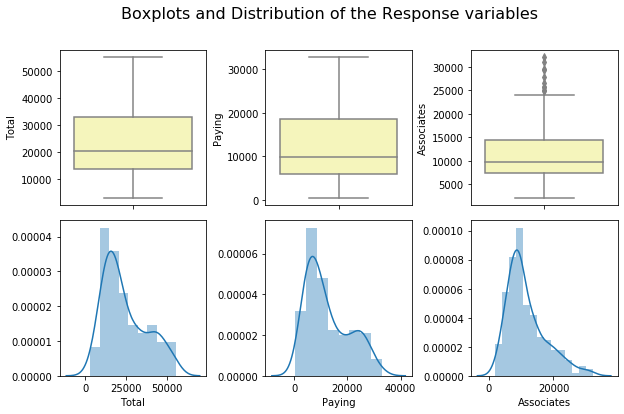

In [0]:
#boxplots and distribution of the response variables.

fig = plt.subplots(ncols=3, nrows=1, figsize=[10,6])
fig = plt.subplots_adjust(hspace=0.1, wspace=0.4)
fig = plt.suptitle('Boxplots and Distribution of the Response variables', fontsize=16)
plt.subplot(2,3,1)
fig = sns.boxplot(x='Total', data = df, orient='v', color='#ffffb2')
fig.set_ylabel('Total')
plt.subplot(2,3,2)
fig=sns.boxplot(x='Paying', data=df, orient='v', color ='#ffffb2')
plt.subplot(2,3,3)
fig=sns.boxplot(x='Associates', data=df, orient='v', color ='#ffffb2')
plt.subplot(2,3,4)
fig = sns.distplot(df['Total'], norm_hist= True, kde = True)
plt.subplot(2,3,5)
fig=sns.distplot(df['Paying'], norm_hist= True, kde = True)
plt.subplot(2,3,6)
fig=sns.distplot(df['Associates'], norm_hist = True, kde = True)
plt.show()

Note that the total and paying public have the same distribution and also don't have any outliers, while the associates presented a slithly different distribution and a few outliers. Since the focus are the total and paying public, no treatment was applied to the associates outliers.

Also, the total and paying public distribution seem to be a bimodal distribution, with two peaks: one at a smaller public and another at a full stadium public. 

Next, we will try to get some information about the features and analyse if there are some correlations between them.

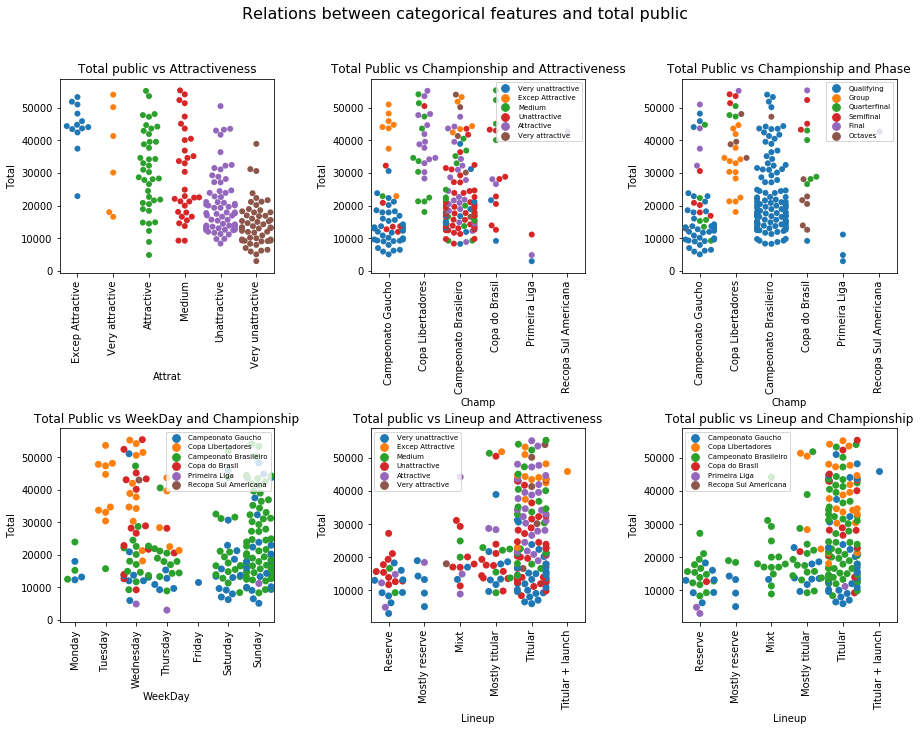

In [0]:
#Visual representation between the categorical features and the Total Public

fig = plt.subplots(ncols=3, nrows=2, sharey='col', figsize=[15,10])
fig = plt.subplots_adjust(hspace=0.8, wspace=0.45)
fig = plt.suptitle("Relations between categorical features and total public", fontsize=16)
plt.subplot(2,3,1)
fig = sns.swarmplot(x='Attrat',y='Total', order = ['Excep Attractive', 'Very attractive', 'Attractive', 
                                                   'Medium', 'Unattractive', 'Very unattractive'],
                    data=df, size = 6)
plt.xticks(rotation=90)
plt.title('Total public vs Attractiveness')

plt.subplot(2,3,2)
fig = sns.swarmplot(x='Champ',y='Total', data=df, size=6, hue= 'Attrat')
plt.xticks(rotation=90)
plt.title('Total Public vs Championship and Attractiveness')
plt.legend(loc='upper right', fontsize = 7)

plt.subplot(2,3,3)
fig = sns.swarmplot(x='Champ',y='Total', data=df, size=6, hue = 'Phase')
plt.xticks(rotation=90)
plt.title('Total Public vs Championship and Phase')
plt.legend(loc='upper right', fontsize = 7)

plt.subplot(2,3,4)
fig = sns.swarmplot(x='WeekDay',y='Total', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                                   'Friday', 'Saturday', 'Sunday'], 
                    data=df, size=7, hue= 'Champ')
plt.xticks(rotation=90)
plt.title('Total Public vs WeekDay and Championship')
plt.legend(loc='upper right', fontsize = 7)

plt.subplot(2,3,5)
fig = sns.swarmplot(x='Lineup',y='Total',order = ['Reserve', 'Mostly reserve', 'Mixt', 
                                                  'Mostly titular', 'Titular', 'Titular + launch'], 
                    data=df, size=7, hue = 'Attrat')
plt.xticks(rotation=90)
plt.title('Total public vs Lineup and Attractiveness')
plt.legend(loc='upper left', fontsize = 7)

plt.subplot(2,3,6)
fig = sns.swarmplot(x='Lineup',y='Total', order = ['Reserve', 'Mostly reserve', 'Mixt', 
                                                   'Mostly titular', 'Titular', 'Titular + launch'], 
                    data=df, size=7, hue= 'Champ')
plt.xticks(rotation=90)
plt.title('Total public vs Lineup and Championship')
plt.legend(loc='upper left', fontsize = 7)

plt.show()

Further analysis of the pictures above can be seen at the full paper. Here, we can note that the higher the opponent atractiveness, the higher is the total public. Also, there is some differences between the championships and it seems to have some interaction between atractiveness and championship.

Proceeding with the analysis, we will evaluate the relationship between the public and the evolution of sales, throught the accumulated number of tickets sold from five days prior the match until the match day. Also, we generate a heatmap of the features correlations.

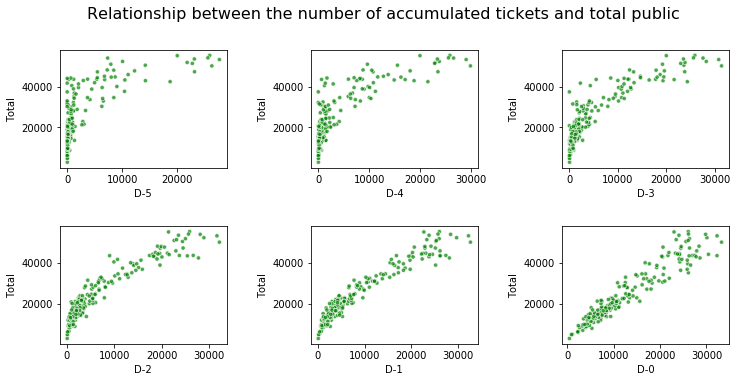

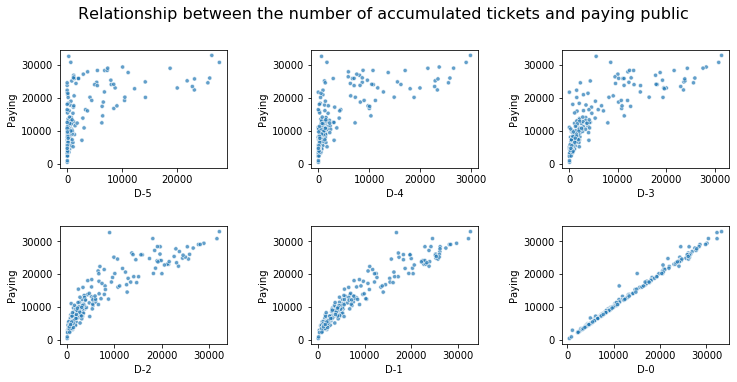

In [0]:
#Relationship between the number of accumulated tickets and total public during the six days
fig = plt.subplots(ncols=3, nrows=2, figsize=[12,6])
fig = plt.subplots_adjust(bottom = 0.2, hspace=0.5, wspace=0.5)
fig = plt.suptitle("Relationship between the number of accumulated tickets and total public",
                   fontsize=16)
plt.subplot(2,3,1)
fig = sns.scatterplot(x='D-5',y='Total', data=df, size=7, legend=None, alpha = 0.7, color = "g")
plt.subplot(2,3,2)
fig = sns.scatterplot(x='D-4',y='Total', data=df, size=7, legend=None, alpha = 0.7, color = "g")
plt.subplot(2,3,3)
fig = sns.scatterplot(x='D-3',y='Total', data=df, size=7, legend=None, alpha = 0.7, color = "g")
plt.subplot(2,3,4)
fig = sns.scatterplot(x='D-2',y='Total', data=df, size=7, legend=None, alpha = 0.7, color = "g")
plt.subplot(2,3,5)
fig = sns.scatterplot(x='D-1',y='Total', data=df, size=7, legend=None, alpha = 0.7, color = "g")
plt.subplot(2,3,6)
fig = sns.scatterplot(x='D-0',y='Total', data=df, size=7, legend=None, alpha = 0.7, color = "g")
plt.show()
print('\n')

#Relationship between the number of accumulated tickets and paying public during the six days
fig = plt.subplots(ncols=3, nrows=2, figsize=[12,6])
fig = plt.subplots_adjust(bottom = 0.2, hspace=0.5, wspace=0.5)
fig = plt.suptitle("Relationship between the number of accumulated tickets and paying public",
                   fontsize=16)
plt.subplot(2,3,1)
fig = sns.scatterplot(x='D-5',y='Paying', data=df, size=7, legend=None, alpha = 0.7)
plt.subplot(2,3,2)
fig = sns.scatterplot(x='D-4',y='Paying', data=df, size=7, legend=None, alpha = 0.7)
plt.subplot(2,3,3)
fig = sns.scatterplot(x='D-3',y='Paying', data=df, size=7, legend=None, alpha = 0.7)
plt.subplot(2,3,4)
fig = sns.scatterplot(x='D-2',y='Paying', data=df, size=7, legend=None, alpha = 0.7)
plt.subplot(2,3,5)
fig = sns.scatterplot(x='D-1',y='Paying', data=df, size=7, legend=None, alpha = 0.7)
plt.subplot(2,3,6)
fig = sns.scatterplot(x='D-0',y='Paying', data=df, size=7, legend=None, alpha = 0.7)
plt.show()

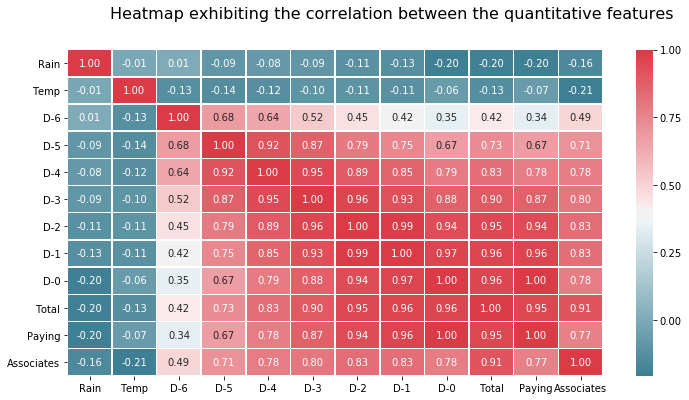

In [0]:
#Spearman correlation between the quantitative features
cluster = df.corr(method='spearman')
mask = np.zeros_like(cluster, dtype = np.bool)

mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(cluster, annot=True, linewidths=0.5, ax=ax, fmt = '.2f', cmap=cmap)
fig.suptitle('Heatmap exhibiting the correlation between the quantitative features', fontsize=16)
plt.show()

From the figures above we can notice that the closer the match day, the greater the correlation. Also, temperature and rain have a low but present correlation that decrease the public and the sales. 

# **2º - Appyling h2o.AutoML**
---
Now that we know more about the dataset, this session will apply the h2o AutoML function to find the best models hyperparameters that will be further analized in the next session.

First, installling h2o autoML library to run the best models and find the best hyperparameters to train the data and inicialize it.

In [0]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OXGBoostEstimator

#inicializing the library
h2o.init()

Now, convert the data into a h2o DataFrame.

In [0]:
#Parse into a h2o autoML file
df = h2o.import_file('/content/Dataset.csv', header = 1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Let's take a look at the data:

In [0]:
df.describe()

Rows:210
Cols:19




,Hour,WeekDay,Champ,Phase,Lineup,Attrat,Rain,Temp,Marketing,D-6,D-5,D-4,D-3,D-2,D-1,D-0,Total,Paying,Associates
type,enum,enum,enum,enum,enum,enum,int,int,enum,int,int,int,int,int,int,int,int,int,int
mins,,,,,,,0.0,8.0,,0.0,0.0,0.0,0.0,51.0,94.0,428.0,2944.0,428.0,2097.0
mean,,,,,,,5.638095238095237,22.428571428571423,,1558.757142857143,2525.6857142857134,3726.233333333333,5036.366666666667,6898.5857142857185,8609.490476190482,12357.771428571434,24189.28095238096,12542.399999999996,11629.71904761905
maxs,,,,,,,200.0,37.0,,25881.0,27633.0,29922.0,31391.0,32167.0,32638.0,33250.0,55337.0,32928.0,32176.0
sigma,,,,,,,19.05048634149127,5.956552650696501,,4448.069559569288,5490.957972937008,6488.210182778997,7208.001433404084,7992.966234725379,8434.288718895554,8156.984647576979,13258.569799252293,8147.433421683515,6043.532062585709
zeros,,,,,,,149,0,,97,23,9,4,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,19:30,Sunday,Campeonato Gaucho,Qualifying,Mostly reserve,Very unattractive,0.0,35.0,Normal,6.0,21.0,27.0,78.0,162.0,327.0,1078.0,5029.0,2932.0,2097.0
1,19:30,Thursday,Campeonato Gaucho,Qualifying,Titular,Very unattractive,0.0,33.0,Normal,11.0,57.0,217.0,367.0,657.0,1422.0,5656.0,10824.0,5862.0,4962.0
2,19:30,Wednesday,Campeonato Gaucho,Qualifying,Titular,Very unattractive,0.0,37.0,Normal,0.0,49.0,70.0,92.0,232.0,529.0,2328.0,5895.0,2420.0,3475.0


Note that categorical features are described as 'enum' and numerical features are described as 'int' on the table above. 

Now the Data Frame is ready to be used in the h2o autoML run.

## a) Total Public

This session will obtain the best models to predict total public from h2o.autoML library.

First, let's identify the response column and save the column name as y. In this dataset, we will use all columns except the response and paying public as predictors, so we can set x as all columns minus these variables. Also, we will drop the D-0 and D-1 accumulated values of tickets sold, since we want to predict the public two days prior the match, with appropriate time to make management decisions.

In [0]:
#setting the response column
y = "Total"

#setting the features
x = df.columns
x.remove(y)
x.remove("Paying")
x.remove("Associates")
x.remove("D-0")
x.remove("D-1")
print('Response variable: \n', y)
print('Features: \n', x)

Response variable: 
 Total
Features: 
 ['Hour', 'WeekDay', 'Champ', 'Phase', 'Lineup', 'Attrat', 'Rain', 'Temp', 'Marketing', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2']


Now, let's run the AutoML, stopping after 60 seconds. The **max_runtime_secs** argument provides a way to limit the AutoML run by time, usually recomended for regression models. When using a time-limited stopping criterion, the number of models train will vary between runs. If different hardware is used or even if the same machine is used but the available compute resources on that machine are not the same between runs, then AutoML may be able to train more models on one run vs another.

Because the dataset is not big enough, it was used the cross-validation parameter to train the data. It is passed explicitly to the **cv** argument in the model, which means that we will use cross-validated metrics for generating the leaderboard. Also, we will use the **Mean Absolute Error** as metric to rank the models.

In [0]:
#setting the seed to guarantee reproducibility
import numpy as np
np.random.seed(1234)

#setting the parameters and running the autoML function
aml = H2OAutoML(max_runtime_secs = 60,       
                seed = 1234,                   
                nfolds = 10,                      
                sort_metric= 'MAE',           
                project_name = 'ArticleML',
                verbosity = 'None')

aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


Next, we will view the AutoML Leaderboard to verify the best models. The Leaderboard will be sorted by the metric we specified above, using cross-validation metrics.

In [0]:
lb = aml.leaderboard
aml.leaderboard.show(use_pandas=True ,rows=16)


,model_id,mae,mean_residual_deviance,rmse,mse,rmsle
0,XGBoost_3_AutoML_20200114_185927,2595.781961,1.124637e+07,3353.561485,1.124637e+07,0.183238
1,StackedEnsemble_BestOfFamily_AutoML_20200114_1...,2623.830241,1.123419e+07,3351.743960,1.123419e+07,0.186294
2,XGBoost_2_AutoML_20200114_185927,2653.392846,1.122323e+07,3350.109107,1.122323e+07,0.192479
3,XGBoost_1_AutoML_20200114_185927,2748.664600,1.219861e+07,3492.650912,1.219861e+07,0.198266
4,GBM_4_AutoML_20200114_185927,2819.338235,1.271474e+07,3565.773401,1.271474e+07,0.199102
5,GBM_2_AutoML_20200114_185927,2868.333568,1.318189e+07,3630.687863,1.318189e+07,0.202712
6,GBM_3_AutoML_20200114_185927,2889.917167,1.339700e+07,3660.190910,1.339700e+07,0.204814
7,GBM_1_AutoML_20200114_185927,2890.504440,1.346239e+07,3669.113067,1.346239e+07,0.203005
8,XRT_1_AutoML_20200114_185927,2939.950385,1.509890e+07,3885.730167,1.509890e+07,0.205602
9,DRF_1_AutoML_20200114_185927,3057.660428,1.556007e+07,3944.625024,1.556007e+07,0.213772


After seeing the ranking obtained by the AutoML, we will get the best model parameters, using the summary function. This function will return some of the hyperparameters used in the model.

Also, we will create a function called ***find*** to get the name of the different models for each algorithm. This function will get the first name on the learderboard list that contain the algorithm we are searching for. In this way, it is possible to later compare the different algorithms performance by getting the hyperparameters tested by the h2o AutoML.

In [0]:
#Get a list with the model names from the leaderboard
lb = aml.leaderboard.as_data_frame(use_pandas = True)
model_ids = str(lb['model_id'])

#Create the find function
import re
def find(lista, valor):
    m = re.search(valor, lista)
    return m.group(0)

#Using the 'find' function to get the fist model on the list that was built
#with Extreme Gradient Boosting (XGBoost) algorithm 
name = find(model_ids, 'XGBoost[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model2 = h2o.get_model(name)
params = model2.summary()
params.show()

The best model with this algorithm is:  XGBoost_3_AutoML_20200114_185927

Model Summary: 


,,number_of_trees
0,,115.0


In [0]:
# Using the 'find' function to get the fist model on the list that was built
# with Gradient Boosting Machines (GBM) algorithm 
name = find(model_ids, 'GBM[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model2 = h2o.get_model(name)
params = model2.summary()
params.show()

The best model with this algorithm is:  GBM_4_AutoML_20200114_185927

Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,54.0,54.0,11961.0,5.0,10.0,6.685185,11.0,15.0,12.981482


In [0]:
# Using the 'find' function to get the fist model on the list that was built
# with Distributed Random Forest (DRF) algorithm 
name = find(model_ids, 'DRF[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model3 = h2o.get_model(name)
params = model3.summary()
params.show()

The best model with this algorithm is:  DRF_1_AutoML_20200114_185927

Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,36.0,36.0,62419.0,12.0,17.0,14.111111,118.0,148.0,133.16667


In [0]:
# Using the 'find' function to get the fist model on the list that was built
# with Extremely Randomized Forest (XRF) algorithm 
name = find(model_ids, 'XRT[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model4 = h2o.get_model(name)
params = model4.summary()
params.show()

The best model with this algorithm is:  XRT_1_AutoML_20200114_185927

Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,37.0,37.0,66867.0,13.0,19.0,16.243244,119.0,156.0,138.86487


In [0]:
# Using the 'find' function to get the fist model on the list that was built
# with Deep Learning algorithm 

name = find(model_ids, 'DeepLearning[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model6 = h2o.get_model(name)
params = model6.summary()
params.show()

The best model with this algorithm is:  DeepLearning_1_AutoML_20200114_185927

Status of Neuron Layers: predicting Total, regression, gaussian distribution, Quadratic loss, 911 weights/biases, 17.0 KB, 2,236 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,67,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.137576,0.350868,0,-0.00487505,0.162041,0.491279,0.0563504
2,,3,10,Rectifier,0,0,0,0.00539833,0.00857328,0,-0.0431578,0.311801,1.00343,0.0151102
3,,4,10,Rectifier,0,0,0,0.014241,0.0489393,0,0.0401154,0.311886,1.00083,0.0136329
4,,5,1,Linear,,0,0,0.000548755,0.00024121,0,0.0559468,0.423923,-0.000693314,1.09713e-154


## b) Paying Public

This session will obtain the best models to predict total public from h2o.autoML library.

The same procedure that was applied to the total public will be also applied to the paying public, to obtain the best models for this case.

In [0]:
#Get the frame and set the rain and temperature as numeric. 
df = h2o.import_file('/content/Dataset.csv')

#Setting the response column
y = "Paying"

#Setting the features
x = df.columns
x.remove(y)
x.remove("Total")
x.remove("Associates")
x.remove("D-0")
x.remove("D-1")
print('Response variable: \n', y)
print('Features: \n', x)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Response variable: 
 Paying
Features: 
 ['Hour', 'WeekDay', 'Champ', 'Phase', 'Lineup', 'Attrat', 'Rain', 'Temp', 'Marketing', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2']


In [0]:
#setting the seed to guarantee reproducibility
import numpy as np
np.random.seed(1234)

#setting the parameters and running the autoML function
aml = H2OAutoML(max_runtime_secs = 60,         
                seed = 1234,                   
                nfolds=10,                      
                sort_metric= 'MAE',
                project_name='ArticleML',
                verbosity='None')

aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
#Get the leaderboard
aml.leaderboard.show(use_pandas=True, rows=16)

,model_id,mae,mean_residual_deviance,rmse,mse,rmsle
0,XGBoost_3_AutoML_20200114_190253,1757.180401,5.778665e+06,2403.885396,5.778665e+06,0.256943
1,StackedEnsemble_BestOfFamily_AutoML_20200114_190253,1780.704247,5.861900e+06,2421.136174,5.861900e+06,0.264043
2,XGBoost_1_AutoML_20200114_190253,1833.163086,5.936539e+06,2436.501310,5.936539e+06,0.275228
3,XGBoost_grid__1_AutoML_20200114_190253_model_1,1844.649704,6.151003e+06,2480.121524,6.151003e+06,0.284504
4,XGBoost_2_AutoML_20200114_190253,1847.880382,6.182936e+06,2486.551074,6.182936e+06,0.282872
5,GBM_4_AutoML_20200114_190253,1859.341508,6.468692e+06,2543.362418,6.468692e+06,0.288388
6,GBM_3_AutoML_20200114_190253,1864.984925,6.643801e+06,2577.557125,6.643801e+06,0.294412
7,GBM_2_AutoML_20200114_190253,1871.326351,6.470137e+06,2543.646486,6.470137e+06,0.274646
8,GBM_1_AutoML_20200114_190253,1927.311696,7.188332e+06,2681.106552,7.188332e+06,0.292002
9,XRT_1_AutoML_20200114_190253,1986.246425,7.517083e+06,2741.729902,7.517083e+06,0.297128


In [0]:
#Get a list with the model names from the leaderboard for this scenario
lb2 = aml.leaderboard.as_data_frame(use_pandas = True)
model_ids2 = str(lb2['model_id'])

# Using the 'find' function to get the fist model on the list that was built
# with Extreme Gradient Boosting (XGBoost) algorithm 
name = find(model_ids2, 'XGBoost[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model1 = h2o.get_model(name)
params = model1.summary()
params.show()

The best model with this algorithm is:  XGBoost_3_AutoML_20200114_190253

Model Summary: 


,,number_of_trees
0,,107.0


In [0]:
# Using the 'find' function to get the fist model on the list that was built
# with Gradient Boosting Machines (GBM) algorithm 
name = find(model_ids2, 'GBM[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model2 = h2o.get_model(name)
params = model2.summary()
params.show()

The best model with this algorithm is:  GBM_4_AutoML_20200114_190253

Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,55.0,55.0,12069.0,5.0,10.0,6.890909,11.0,15.0,12.854546


In [0]:
# Using the 'find' function to get the fist model on the list that was built
# with Extremely Randomized Forest (XRT) algorithm 
name = find(model_ids2, 'XRT[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model3 = h2o.get_model(name)
params = model3.summary()
params.show()

The best model with this algorithm is:  XRT_1_AutoML_20200114_190253

Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,36.0,36.0,64821.0,12.0,20.0,16.666666,115.0,162.0,138.27777


In [0]:
# Using the 'find' function to get the fist model on the list that was built
# with Distributed Random Forest (DRF) algorithm 
name = find(model_ids2, 'DRF[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model4 = h2o.get_model(name)
params = model4.summary()
params.show()

The best model with this algorithm is:  DRF_1_AutoML_20200114_190253

Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,39.0,39.0,67512.0,12.0,19.0,14.717949,119.0,146.0,132.94872


In [0]:
# Using the 'find' function to get the fist model on the list that was built
# with Deep Learning algorithm 
name = find(model_ids2, 'DeepLearning[_]\S[_]AutoML[_]\S\S\S\S\S\S\S\S[_]\S\S\S\S\S\S')
print('The best model with this algorithm is: ', name)

#Get this model hyperparameters
model5= h2o.get_model(name)
params = model5.summary()
params.show()

The best model with this algorithm is:  DeepLearning_1_AutoML_20200114_190253

Status of Neuron Layers: predicting Paying, regression, gaussian distribution, Quadratic loss, 911 weights/biases, 17.0 KB, 2,236 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,67,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.136012,0.348725,0,-0.00401765,0.162081,0.496466,0.0636203
2,,3,10,Rectifier,0,0,0,0.00679243,0.0153508,0,-0.0370198,0.325403,0.996655,0.0138232
3,,4,10,Rectifier,0,0,0,0.00844321,0.018045,0,0.0394388,0.31536,0.996671,0.0317813
4,,5,1,Linear,,0,0,0.000530283,0.000231604,0,0.0641583,0.427041,0.0123426,1.09713e-154


#**3º - Comparing different algorithms**

---

This session will compare different algorithms to predict the total and paying public and use the hyperparameters found in the previous session.

As we could see, the algorithms and the hyperparameters were very similiar (almost identical) for both total and paying public. It can be explained by the similarity between the data distribution presented in the fisrt session. Thus, we will analyse more deeply the algorithms using only the total public and then evaluate the best models for total and paying public. 

Also, the automated machine learning indicated that the boosted algorithms and also tree-based models were the best models to predict the audience. Therefore, we selected the following algorihtms to evaluate:


1.   Extreme Gradient Boosting - XGB
2.   Gradient Boosting Machines - GBM
3.   Decision Tree - DT
4.   Random Forest - RF
5.   Extremely Randomized Forests - XRT
6.   Adaptative Boosting - ADA
7.   K-Nearest Neighbors - KNN
8.   Linear Model with Stochastic Gradient Descent- LM
8.   Artificial Neural Network - ANN






## a) Evaluating the models performance on Total Public

First, we will import the basic lybraries such as numpy and pandas to import the file and get started.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Import Excel file
data = pd.ExcelFile(r'/content/Dataset.xlsx')

#Parsing Excel Sheet to a pandas DataFrame.
df = pd.read_excel(data, 'BD')
print(df)

         Hour    WeekDay                  Champ  ...  Total   Paying Associates
0    19:30:00     Sunday      Campeonato Gaucho  ...   5029   2932.0     2097.0
1    19:30:00   Thursday      Campeonato Gaucho  ...  10824   5862.0     4962.0
2    19:30:00  Wednesday      Campeonato Gaucho  ...   5895   2420.0     3475.0
3    19:30:00     Sunday      Campeonato Gaucho  ...  22889  13840.0     9049.0
4    18:30:00   Saturday      Campeonato Gaucho  ...   6971   3522.0     3449.0
..        ...        ...                    ...  ...    ...      ...        ...
205  18:00:00     Sunday  Campeonato Brasileiro  ...  44376  23738.0    20638.0
206  21:00:00   Thursday  Campeonato Brasileiro  ...  13244   4645.0     8599.0
207  16:00:00     Sunday  Campeonato Brasileiro  ...  30980  17600.0    13380.0
208  19:00:00     Sunday  Campeonato Brasileiro  ...  24464  13332.0    11132.0
209  16:00:00   Thursday  Campeonato Brasileiro  ...  20454   9644.0    10810.0

[210 rows x 19 columns]


Next, we will need to encode the categorical features into columns of 0 and 1 to train and test the models. It can be done by the get_dummies function on pandas lybraries. 

In [0]:
#Encoding categorical features
df_dummies = pd.get_dummies(df)
print(df_dummies.describe())

             Rain        Temp  ...  Marketing_Far above normal  Marketing_Normal
count  210.000000  210.000000  ...                  210.000000        210.000000
mean     5.638952   22.402381  ...                    0.004762          0.990476
std     19.067576    5.943413  ...                    0.069007          0.097356
min      0.000000    8.000000  ...                    0.000000          0.000000
25%      0.000000   18.000000  ...                    0.000000          1.000000
50%      0.000000   22.000000  ...                    0.000000          1.000000
75%      1.660000   26.375000  ...                    0.000000          1.000000
max    200.000000   37.000000  ...                    1.000000          1.000000

[8 rows x 65 columns]


Now that the dataset is encoded, we will divide them into two datasets: one for paying public and another for total public. Also, we will get a dataset for the features (that are commmon to both datasets) and drop the D-1 and D-0 features because we want to predict the public to days in advance.

In [0]:
#Dividing one dataset for paying public and another for total public.
df_total = df_dummies.drop(['Paying', 'Associates'],1)
df_pay = df_dummies.drop(['Total', 'Associates'], 1)
df_features = df_total.drop(['Total', 'D-0', 'D-1'],1)

#Defining the response variables and the features frame
#Total as response variable
Y1 = df_total["Total"].values  
#Paying as response variable
Y2 = df_pay["Paying"].values 
#X as features frame
X = df_features.values

#Getting the columns names
print(df_features.columns)

Index(['Rain', 'Temp', 'D-6', 'D-5', 'D-4', 'D-3', 'D-2', 'Hour_11:00:00',
       'Hour_15:00:00', 'Hour_16:00:00', 'Hour_16:20:00', 'Hour_16:30:00',
       'Hour_17:00:00', 'Hour_18:00:00', 'Hour_18:30:00', 'Hour_19:00:00',
       'Hour_19:15:00', 'Hour_19:30:00', 'Hour_20:00:00', 'Hour_20:30:00',
       'Hour_21:00:00', 'Hour_21:15:00', 'Hour_21:30:00', 'Hour_21:45:00',
       'Hour_21:50:00', 'Hour_22:00:00', 'WeekDay_Friday', 'WeekDay_Monday',
       'WeekDay_Saturday', 'WeekDay_Sunday', 'WeekDay_Thursday',
       'WeekDay_Tuesday', 'WeekDay_Wednesday', 'Champ_Campeonato Brasileiro',
       'Champ_Campeonato Gaucho', 'Champ_Copa Libertadores',
       'Champ_Copa do Brasil', 'Champ_Primeira Liga',
       'Champ_Recopa Sul Americana', 'Phase_Final', 'Phase_Group',
       'Phase_Octaves', 'Phase_Qualifying', 'Phase_Quarterfinal',
       'Phase_Semifinal', 'Lineup_Mixt', 'Lineup_Mostly reserve',
       'Lineup_Mostly titular', 'Lineup_Reserve', 'Lineup_Titular',
       'Lineup_Titular 

As we can see above, there are one column for each feature and its category. Next, we will import all the required lybraries to evaluate the selected models.

In [0]:
#Importing importantant lybraries for analysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut, KFold, learning_curve, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
!pip install xgboost
from xgboost import XGBRegressor, plot_importance, plot_tree

!pip install keras
!pip install tensorflow==2.0.0
from tensorflow.python.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import SGD

To start the analysis, we evaluate the ideal number of K neighbors for the algorithm KNN, ranging from 0 to 20 neighbors.

MAE value for k=  1 is: 3509.7380952380954
MAE value for k=  2 is: 3154.6428571428573
MAE value for k=  3 is: 2931.928571428571
MAE value for k=  4 is: 3221.220238095238
MAE value for k=  5 is: 3114.8047619047616
MAE value for k=  6 is: 3175.9285714285716
MAE value for k=  7 is: 3204.891156462585
MAE value for k=  8 is: 3345.502976190476
MAE value for k=  9 is: 3405.7275132275136
MAE value for k=  10 is: 3389.207142857143
MAE value for k=  11 is: 3457.623376623376
MAE value for k=  12 is: 3452.0634920634925
MAE value for k=  13 is: 3465.5842490842488
MAE value for k=  14 is: 3435.748299319728
MAE value for k=  15 is: 3487.0190476190483
MAE value for k=  16 is: 3551.784226190476
MAE value for k=  17 is: 3513.6008403361348
MAE value for k=  18 is: 3505.5978835978826
MAE value for k=  19 is: 3505.9498746867166
MAE value for k=  20 is: 3536.310714285714




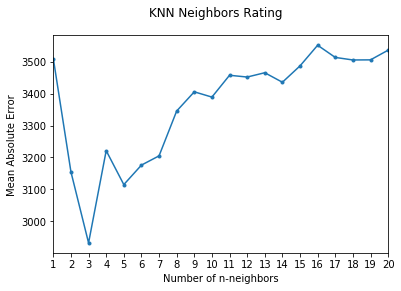

In [0]:
#Evaluating the number of k neighbors for the KNN algorithm

MAE_val = []
k = []

for K in range(20):
    K = K+1
    k.append(K)
    np.random.seed(42)
    X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2)

    model = KNeighborsRegressor(n_neighbors = K)
    modelo = model.fit(X_train, Y1_train)
    pred = modelo.predict(X_test)
    error = mean_absolute_error(Y1_test,pred)
    MAE_val.append(error)
    print('MAE value for k= ' , K , 'is:', error)

print("\n")

plt.figure()
plt.plot(k, MAE_val, '.-')
plt.xlim(1,20)
plt.xticks(np.arange(1,21, step=1))
plt.xlabel("Number of n-neighbors")
plt.ylabel("Mean Absolute Error")
plt.suptitle("KNN Neighbors Rating")
plt.show()

As we could see, 3 neighbors is the ideal number since it results in the smaler MAE. Now, we can train and test KNN model using Leave-One-Out cross validation (LOOCV) strategy.

In [0]:
#Predicting using the KNN method without standardization
np.random.seed(1234)
loo = LeaveOneOut()
KNN = KNeighborsRegressor(n_neighbors=3)
predictionsKNN=[]
errKNN=[]

loo.get_n_splits(X)
for train_index, test_index in loo.split(X):
   X_train, X_test = X[train_index], X[test_index]
   Y1_train, Y1_test = Y1[train_index], Y1[test_index]
   model= KNN.fit(X_train, Y1_train)
   predict = model.predict(X_test)
   predictionsKNN.append(predict)
   errKNN.append(mean_absolute_error(Y1_test, predict))

errKNN = np.ravel(np.array(errKNN).reshape(-1,1))

Now that the KNN is already trained, we standardized the data in order to train and test the next models. Also, we saved the response variable mean and stardad deviation to use them to scale back the predictions later.

Mean =  [24189.28095238]
Standard deviation =  [13226.96410519]


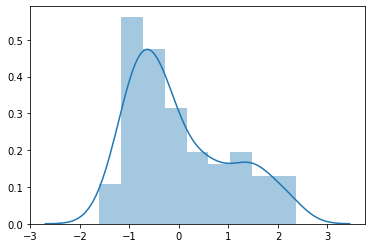

In [0]:
#Normalizing the data with the Standard Scaler funcion
scaler = StandardScaler()
Xt = scaler.fit_transform(X=X)
Y1 = Y1.reshape(-1,1)
Y1t = np.ravel(scaler.fit_transform(Y1))

#Saving the data mean and standard deviation 
Ymean = scaler.mean_
Ystd = np.sqrt(scaler.var_)

print('Mean = ', Ymean)
print('Standard deviation = ', Ystd)

#Plotting the standardized distribution 
fig = sns.distplot(Y1t, norm_hist= True, kde = True)

Below, we set all the models hyperparameters based on what it was indicated from the automated machine learning. The models' test and train occured in the loop and all their predictions were saved.

In [0]:
#Setting the seed
np.random.seed(1234)

#Setting the cross validation method to Leave One Out
loo = LeaveOneOut()

#Setting the parameters of the others models
GBM = GradientBoostingRegressor(learning_rate=0.1,                      
                                n_estimators=54,
                                max_depth=10,
                                max_leaf_nodes=15,
                                random_state=1234)

RF = RandomForestRegressor(n_estimators = 36,
                           max_depth = 17,
                           max_leaf_nodes = 142,
                           random_state = 1234)

XRT = ExtraTreesRegressor(n_estimators=37,
                          max_depth=19,
                          max_leaf_nodes=156,
                          random_state=1234,
                          bootstrap= True)

LM = SGDRegressor(alpha = 0.07724, max_iter=30, random_state = 1234)

ADA = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=19, max_leaf_nodes = 156),
                        n_estimators = 115,
                        learning_rate = 0.1,
                        random_state = 1234)

XGB = XGBRegressor(learning_rate=0.1,
                   n_estimators = 115,
                   random_state = 1234,
                   verbosity = 0)

DT = DecisionTreeRegressor(max_depth=19)

#Creatind the list of models
models = []
models.append(GBM), models.append(RF), models.append(LM)
models.append(XRT), models.append(ADA), models.append(XGB), models.append(DT)

#Creating lists to save each model's predictions 
predictionsGBM = []
predictionsRF = []
predictionsXRT = []
predictionsLM = []
predictionsXGB = []
predictionsADA = []
predictionsDT = []

#Training and testing the models
loo.get_n_splits(Xt)
for train_index, test_index in loo.split(Xt):
    X_train, X_test, Y1_train, Y1_test = Xt[train_index], Xt[test_index], Y1t[train_index], Y1t[test_index]
    for model in models:
        modelo = model.fit(X_train, Y1_train)
        predict = modelo.predict(X_test)
        if model == GBM:
          predictionsGBM.append(predict)
        elif model == XRT:
          predictionsXRT.append(predict)
        elif model == RF:
          predictionsRF.append(predict)
        elif model == LM:
          predictionsLM.append(predict)
        elif model == ADA:
          predictionsADA.append(predict)
        elif model == XGB:
          predictionsXGB.append(predict)
        elif model == DT:
          predictionsDT.append(predict)

Finally, we still need to create the neural network. The ANN model is created below, using the hyperparameter from autoML. Although it was not shown on autoML results, we added dropout function at each layer to prevent overfitting since the dataset is limited.

In [0]:
#Create thee Neural Network sequencial model 
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(67, kernel_initializer='normal', input_dim = 60))

# The Hidden Layers :
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 67)                4087      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                680       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0

With the model created above, we trained and tested the model using LOOCV with a batch size of 1 and 5 epochs for each cross-validation loop.

In [0]:
#Creating a checkpoint for the model fit
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

#Setting seed
np.random.seed(1234)
predictionsNN = []
err = []

#Training and testing the model
loo.get_n_splits(Xt)
for train_index, test_index in loo.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    Y1_train, Y1_test = Y1t[train_index], Y1t[test_index]
    mod = NN_model.fit(X_train, Y1_train, epochs=5, batch_size=1, validation_split = 0.2, callbacks=callbacks_list)
    predict = NN_model.predict(X_test)
    predictionsNN.append(predict)
    err.append(mean_absolute_error(Y1_test, predict))

Train on 167 samples, validate on 42 samples
Epoch 1/5
163/167 [============================>.] - ETA: 0s - loss: 0.7874 - mean_absolute_error: 0.7874
Epoch 00001: val_loss improved from inf to 0.91131, saving model to Weights-001--0.91131.hdf5
167/167 [==============================] - 1s 5ms/sample - loss: 0.7849 - mean_absolute_error: 0.7849 - val_loss: 0.9113 - val_mean_absolute_error: 0.9113
Epoch 2/5
137/167 [=======================>......] - ETA: 0s - loss: 0.7993 - mean_absolute_error: 0.7993
Epoch 00002: val_loss did not improve from 0.91131
167/167 [==============================] - 0s 1ms/sample - loss: 0.7725 - mean_absolute_error: 0.7725 - val_loss: 0.9136 - val_mean_absolute_error: 0.9136
Epoch 3/5
140/167 [========================>.....] - ETA: 0s - loss: 0.7995 - mean_absolute_error: 0.7995
Epoch 00003: val_loss did not improve from 0.91131
167/167 [==============================] - 0s 1ms/sample - loss: 0.7721 - mean_absolute_error: 0.7721 - val_loss: 0.9145 - val_mean

After running all the models, we scale back all the predictions using the mean and standard deviation from the response variable and calculated the error metrics for comparison.  

In [0]:
#Scaling back the predictions from the ANN model and getting the error metrics
ypredNN = np.ravel(np.array((predictionsNN*(Ystd) + (Ymean)).reshape(-1,1)))
errNN = np.ravel(err)
MAE_NN = mean_absolute_error(Y1, ypredNN)
r2_NN = r2_score(Y1, ypredNN)
RMSE_NN = np.sqrt(mean_squared_error(Y1,ypredNN))

In [0]:
#Scaling back the predictions from the other models and getting the error metrics
lista =[(predictionsADA, 'ADA'), (predictionsDT, 'DT'), (predictionsGBM, 'GBM'), 
        (predictionsRF, 'RF'), (predictionsXRT,'XRT'), (predictionsLM, 'LM'),
        (predictionsXGB, 'XGB')]

errADA = []
errRF = []
errGBM = []
errXGB = []
errDT = []
errXRT = []
errLM = []

for (pred, name) in lista:
     pred = np.ravel(np.array((pred*(Ystd) + (Ymean)).reshape(-1,1)))
     err = np.ravel(abs(Y1 - pred)) 
     if name == 'ADA':
        errADA = err
        MAE_ADA = mean_absolute_error(Y1, pred)
        r2_ADA = r2_score(Y1, pred)
        RMSE_ADA = np.sqrt(mean_squared_error(Y1,pred))
        ypredADA = pred
     elif name == 'DT':
        errDT = err
        MAE_DT = mean_absolute_error(Y1, pred)
        r2_DT = r2_score(Y1, pred)
        RMSE_DT = np.sqrt(mean_squared_error(Y1,pred))
        ypredDT = pred
     elif name == 'GBM':
        errGBM = err
        MAE_GBM = mean_absolute_error(Y1, pred)
        RMSE_GBM = np.sqrt(mean_squared_error(Y1,pred))
        r2_GBM = r2_score(Y1, pred)
        ypredGBM = pred
     elif name == 'RF':
        errRF = err
        MAE_RF = mean_absolute_error(Y1, pred)
        RMSE_RF = np.sqrt(mean_squared_error(Y1,pred))
        r2_RF = r2_score(Y1, pred)
        ypredRF = pred
     elif name == 'XRT':
        errXRT = err
        MAE_XRT = mean_absolute_error(Y1, pred)
        RMSE_XRT = np.sqrt(mean_squared_error(Y1,pred))
        r2_XRT = r2_score(Y1, pred)
        ypredXRT = pred
     elif name == 'LM':
        errLM = err
        MAE_LM = mean_absolute_error(Y1, pred)
        RMSE_LM = np.sqrt(mean_squared_error(Y1,pred))
        r2_LM = r2_score(Y1, pred)
        ypredLM = pred
     elif name == 'XGB':
        errXGB = err
        MAE_XGB = mean_absolute_error(Y1, pred)
        RMSE_XGB = np.sqrt(mean_squared_error(Y1,pred))
        r2_XGB = r2_score(Y1, pred)
        ypredXGB = pred

ypredKNN = np.ravel(np.array(predictionsKNN).reshape(-1,1))
MAE_KNN = mean_absolute_error(Y1, ypredKNN)
r2_KNN = r2_score(Y1, ypredKNN)
RMSE_KNN = np.sqrt(mean_squared_error(Y1,ypredKNN))

#Rearranging the Y1 response variable to get the scatterplot.
Y1 = np.array(df_total["Total"].values)

To visualize the predictions, we plot all the models CV predictions and their real values to see how they performed. Also we indicated on the graph the MAE and the r2 score. 

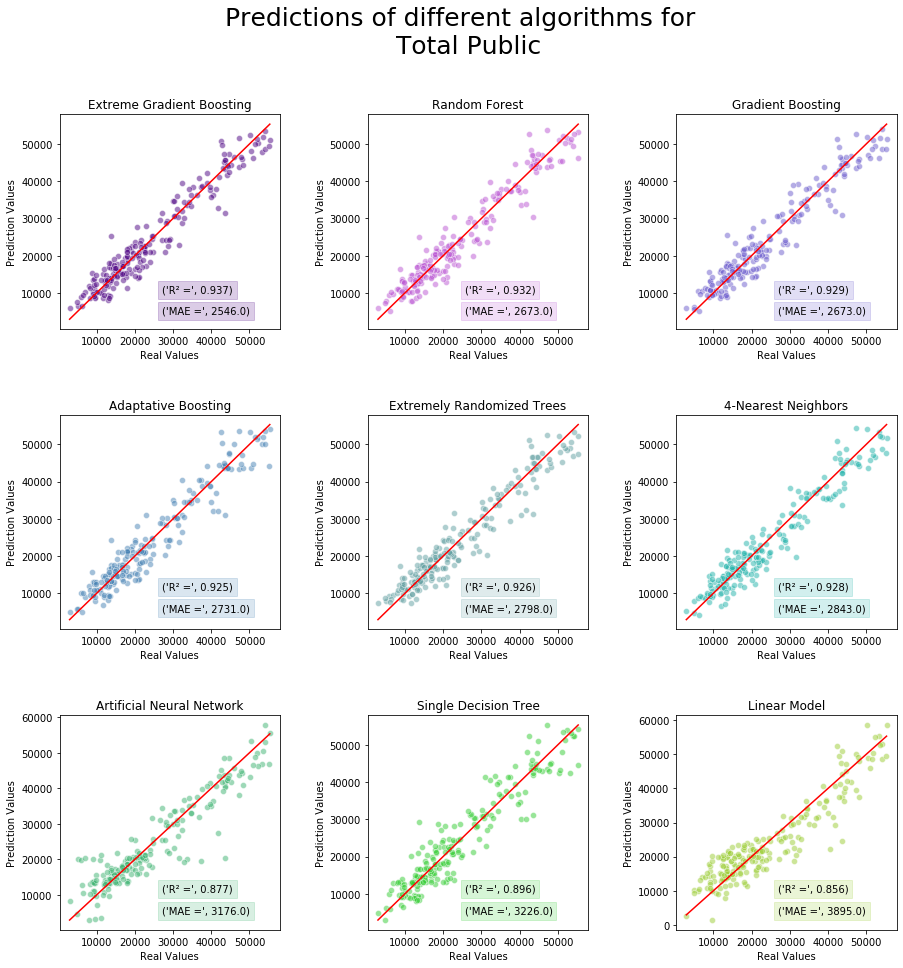

In [0]:
#Scatter plot of the predictions and real values for all the models.
fig1 = plt.subplots(ncols=3, nrows=3, figsize=[15,15])
fig1 = plt.subplots_adjust(hspace=0.4, wspace= 0.4)
fig1 = plt.suptitle("Predictions of different algorithms for \n Total Public", size=25)

plt.subplot(3,3,1)
fig1 = sns.scatterplot(x=Y1,y=ypredXGB, legend = False, alpha = 0.5, color = 'indigo')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s1 = 'MAE =', round(MAE_XGB,0),
s2 = 'R² =', round(r2_XGB, 3)
plt.figtext(0.22, 0.695, s = s1, bbox=dict(color='indigo', alpha=0.2))
plt.figtext(0.22, 0.715, s = s2, bbox=dict(color='indigo', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Extreme Gradient Boosting')

plt.subplot(3,3,2)
fig1 = sns.scatterplot(x=Y1,y=ypredRF, legend = False, alpha = 0.5, color = 'mediumorchid')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s = 'MAE =', round(MAE_RF,0)
s2 = 'R² =', round(r2_RF, 3)
plt.figtext(0.50, 0.695, s = s, bbox=dict(color='mediumorchid', alpha=0.2))
plt.figtext(0.50, 0.715, s = s2, bbox=dict(color='mediumorchid', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Random Forest')

plt.subplot(3,3,3)
fig1 = sns.scatterplot(x=Y1,y=ypredGBM, legend = False, alpha = 0.5, color = 'slateblue')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s1 = 'MAE =', round(MAE_GBM,0)
s2 = 'R² =', round(r2_GBM, 3)
plt.figtext(0.79, 0.695, s = s, bbox=dict(color='slateblue', alpha=0.2))
plt.figtext(0.79, 0.715, s = s2, bbox=dict(color='slateblue', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Gradient Boosting')

plt.subplot(3,3,4)
fig1 = sns.scatterplot(x=Y1,y=ypredADA, legend = False, alpha = 0.5, color = 'steelblue')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s = 'MAE =', round(MAE_ADA,0)
s2 = 'R² =', round(r2_ADA, 3)
plt.figtext(0.22, 0.42, s = s, bbox=dict(color='steelblue', alpha=0.2))
plt.figtext(0.22, 0.44, s = s2, bbox=dict(color='steelblue', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Adaptative Boosting')

plt.subplot(3,3,5)
fig1 = sns.scatterplot(x=Y1,y=ypredXRT, legend = False, alpha = 0.5, color = 'cadetblue')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s = 'MAE =', round(MAE_XRT,0)
s2 = 'R² =', round(r2_XRT, 3)
plt.figtext(0.50, 0.42, s = s, bbox=dict(color='cadetblue', alpha=0.2))
plt.figtext(0.50, 0.44, s = s2, bbox=dict(color='cadetblue', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Extremely Randomized Trees')

plt.subplot(3,3,6)
fig1 = sns.scatterplot(x=Y1,y=ypredKNN,  legend = False, alpha = 0.5, color = 'lightseagreen')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s = 'MAE =', round(MAE_KNN,0)
s2 = 'R² =', round(r2_KNN, 3)
plt.figtext(0.79, 0.42, s = s, bbox=dict(color='lightseagreen', alpha=0.2))
plt.figtext(0.79, 0.44, s = s2, bbox=dict(color='lightseagreen', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('4-Nearest Neighbors')

plt.subplot(3,3,7)
fig1 = sns.scatterplot(x=Y1,y=ypredNN, legend = False, alpha = 0.5, color = 'mediumseagreen')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s = 'MAE =', round(MAE_NN,0)
s2 = 'R² =', round(r2_NN, 3)
plt.figtext(0.22, 0.14, s = s, bbox=dict(color='mediumseagreen', alpha=0.2))
plt.figtext(0.22, 0.16, s = s2, bbox=dict(color='mediumseagreen', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Artificial Neural Network')

plt.subplot(3,3,8)
fig1 = sns.scatterplot(x=Y1,y=ypredDT, legend = False, alpha = 0.5, color = 'limegreen')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s = 'MAE =', round(MAE_DT,0)
s2 = 'R² =', round(r2_DT, 3)
plt.figtext(0.50, 0.14, s = s, bbox=dict(color='limegreen', alpha=0.2))
plt.figtext(0.50, 0.16, s = s2, bbox=dict(color='limegreen', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Single Decision Tree')

plt.subplot(3,3,9)
fig1 = sns.scatterplot(x=Y1,y=ypredLM, legend = False, alpha = 0.5, color = 'yellowgreen')
fig1 = sns.lineplot(x=Y1, y=Y1, color ='r')
s = 'MAE =', round(MAE_LM,0)
s2 = 'R² =', round(r2_LM, 3)
plt.figtext(0.79, 0.14, s = s, bbox=dict(color='yellowgreen', alpha=0.2))
plt.figtext(0.79, 0.16, s = s2, bbox=dict(color='yellowgreen', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Linear Model')

plt.show()

To complete the evaluation, we defined a function to plot the learning function for each model below and generated them. This funcion do not support the ANN model, only the ScikitLearn models.

In [0]:
#Defining a function to plot the learning curve
np.random.seed(1234)
def plot_learning_curve(estimator, X, y, cv=None, score=None):
  train_score=[]
  test_score=[]
  plt.figure()
  plt.xlabel("Training set size")
  plt.ylabel("MAE")
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                          scoring=score,                                                           
                                                          train_sizes=np.linspace(0.01, 1.0, 50),
                                                          verbose = 0)
  train_scores_mean = -np.mean(train_scores, axis=1)
  train_score.append(train_scores_mean)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = -np.mean(test_scores, axis=1)
  test_score.append(test_scores_mean)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
  plt.title(title)

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1,
                   color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="tomato",
           label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="lightgreen",
           label="Cross-validation score")

  plt.legend(loc="best")
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

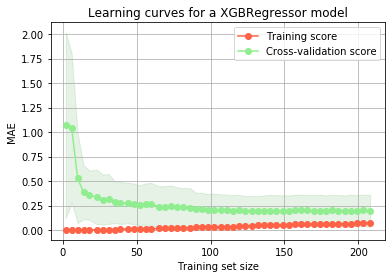

In [0]:
cv = 200
plot_learning_curve(XGB, Xt, Y1t, cv=cv, score='neg_mean_absolute_error')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

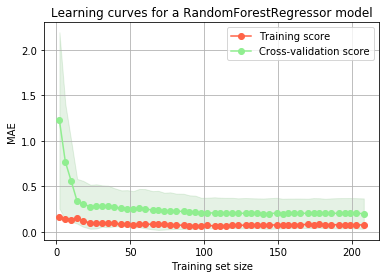

In [0]:
plot_learning_curve(RF, Xt, Y1t, cv=cv, score='neg_mean_absolute_error')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

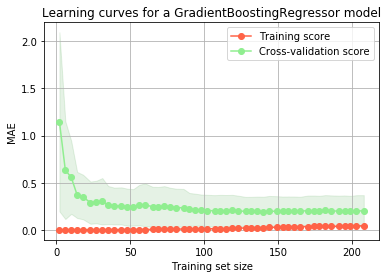

In [0]:
plot_learning_curve(GBM, Xt, Y1t, cv=cv, score='neg_mean_absolute_error')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

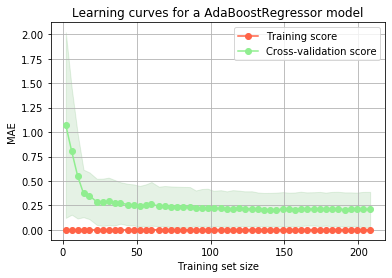

In [0]:
plot_learning_curve(ADA, Xt, Y1t, cv=cv, score='neg_mean_absolute_error')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

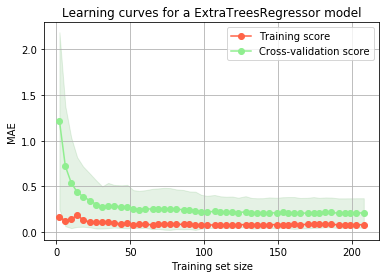

In [0]:
plot_learning_curve(XRT, Xt, Y1t, cv=cv, score='neg_mean_absolute_error')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

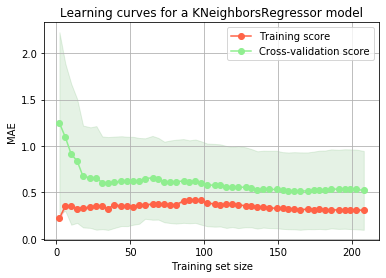

In [0]:
plot_learning_curve(KNeighborsRegressor(n_neighbors=2), Xt, Y1t, cv = cv, score='neg_mean_absolute_error')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

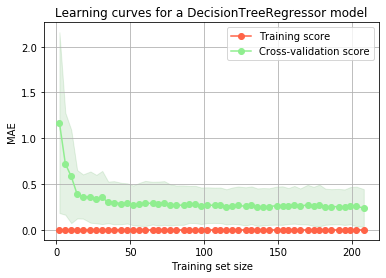

In [0]:
plot_learning_curve(DT, Xt, Y1t, cv=cv, score='neg_mean_absolute_error')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

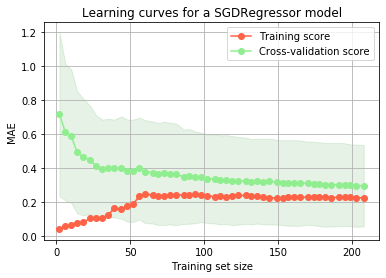

In [0]:
plot_learning_curve(LM, Xt, Y1t, cv=cv, score='neg_mean_absolute_error')

As we can see from the figures above, the LM and KNN models are underfitting the data. It was expected since the inicial data analysis showed that the correlations were not linear.

In addition, we compared the errors distribution in boxplot forms in the figure below. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


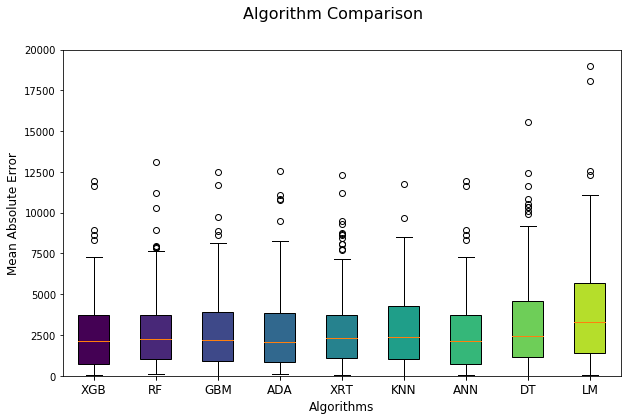

In [0]:
#Errors boxplot comparison for each algorithm

names = ['XGB', 'RF', 'GBM', 'ADA', 'XRT', 'KNN', 'ANN', 'DT', 'LM']
results = [errXGB, errRF, errGBM, errADA, errXRT, errKNN, errNN, errDT, errLM]
fig = plt.figure(figsize=[10,6])
fig.suptitle('Algorithm Comparison', fontsize=16)
plt.xticks(range(1,10),labels=names)
ax = fig.add_subplot(111)
bplot = ax.boxplot(results,patch_artist=True)

cm = plt.cm.get_cmap('viridis')
colors = [cm(val/len(results)) for val in range(len(results))]

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(names, fontsize=12)
ax.set_ylabel("Mean Absolute Error", fontsize=12)
ax.set_xlabel("Algorithms", fontsize=12)
ax.set_ylim(0,20000)
plt.show()



## b) Evaluating the best models for Paying Public

The results from total public prediction analysis showed the domain from the boosted and tree-based models over the others. Therefore, we selected the XGB, GBM, RF and ADA models to evaluate their performance on predicting also the payin public. 

The same procedure done in the previous section was done here for predicting the paying public. 

Mean =  [12542.4043181]
Standard deviation =  [8128.01529693]


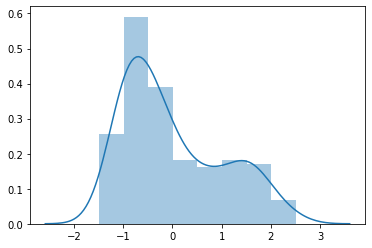

In [0]:
#Standardizing the data with the MinMax funcion
Y2 = Y2.reshape(-1,1)
Y2t = np.ravel(scaler.fit_transform(Y2))

#Saving the mean and standard deviation
Y2mean = scaler.mean_
Y2std = np.sqrt(scaler.var_)

print('Mean = ', Y2mean)
print('Standard deviation = ', Y2std)
 
fig = sns.distplot(Y2t, norm_hist= True, kde = True)

In [0]:
#Setting all models hyperparameters accordingly to autoML

np.random.seed(1234)
loo = LeaveOneOut()

GBM2 = GradientBoostingRegressor(learning_rate=0.1,                      
                                n_estimators=55,
                                max_depth=10,
                                max_leaf_nodes=15,
                                random_state=1234)

ADA2 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=19, max_leaf_nodes = 146),
                        n_estimators = 107,
                        learning_rate = 0.1,
                        random_state = 1234)

XGB2 = XGBRegressor(learning_rate=0.1,
                   n_estimators = 107,
                   random_state = 1234,
                   verbosity = 0)

RF2 = RandomForestRegressor(n_estimators = 39,
                           max_depth = 19,
                           max_leaf_nodes = 146,
                           random_state = 1234)


#Training and testing the models using LOOCV

models = []
models.append(GBM2), models.append(ADA2), models.append(XGB2), models.append(RF2)

predictions2GBM = []
predictions2XGB = []
predictions2ADA = []
predictions2RF = []

loo.get_n_splits(Xt)

for train_index, test_index in loo.split(Xt):
    X_train, X_test, Y2_train, Y2_test = Xt[train_index], Xt[test_index], Y2t[train_index], Y2t[test_index]
    for model in models:
        modelo = model.fit(X_train, Y2_train)
        predict = modelo.predict(X_test)
        if model == GBM2:
          predictions2GBM.append(predict)
        elif model == ADA2:
          predictions2ADA.append(predict)
        elif model == XGB2:
          predictions2XGB.append(predict)
        elif model == RF2:
          predictions2RF.append(predict)

In [0]:
#Scaling back the predictions using the mean and stardard deviation from the response variable
#And also getting the errors metrics
lista =[(predictions2ADA, 'ADA'), (predictions2RF, 'RF'), 
        (predictions2GBM, 'GBM'), (predictions2XGB, 'XGB')]
err2ADA = []
err2RF = []
err2GBM = []
err2XGB = []
for (pred, name) in lista:
     pred = np.ravel(np.array((pred*(Y2std) + (Y2mean)).reshape(-1,1)))
     err = np.ravel(abs(Y2 - pred)) 
     if name == 'ADA':
        err2ADA = err
        MAE2_ADA = mean_absolute_error(Y2, pred)
        r2_ADA2 = r2_score(Y2, pred)
        RMSE_ADA2 = np.sqrt(mean_squared_error(Y2, pred))
        ypred2ADA = pred
     elif name == 'RF':
        err2RF = err
        MAE2_RF = mean_absolute_error(Y2, pred)
        r2_RF2 = r2_score(Y2, pred)
        RMSE_RF2 = np.sqrt(mean_squared_error(Y2, pred))
        ypred2RF = pred
     elif name == 'GBM':
        err2GBM = err
        MAE2_GBM = mean_absolute_error(Y2, pred)
        r2_GBM2 = r2_score(Y2, pred)
        RMSE_GBM2 = np.sqrt(mean_squared_error(Y2, pred))
        ypred2GBM = pred
     elif name == 'XGB':
        err2XGB = err
        MAE2_XGB = mean_absolute_error(Y2, pred)
        r2_XGB2 = r2_score(Y2, pred)
        RMSE_XGB2 = np.sqrt(mean_squared_error(Y2, pred))
        ypred2XGB = pred

Y2 = np.array(df_pay["Paying"].values)

Text(0.5, 1.0, 'Adaptative Boosting')

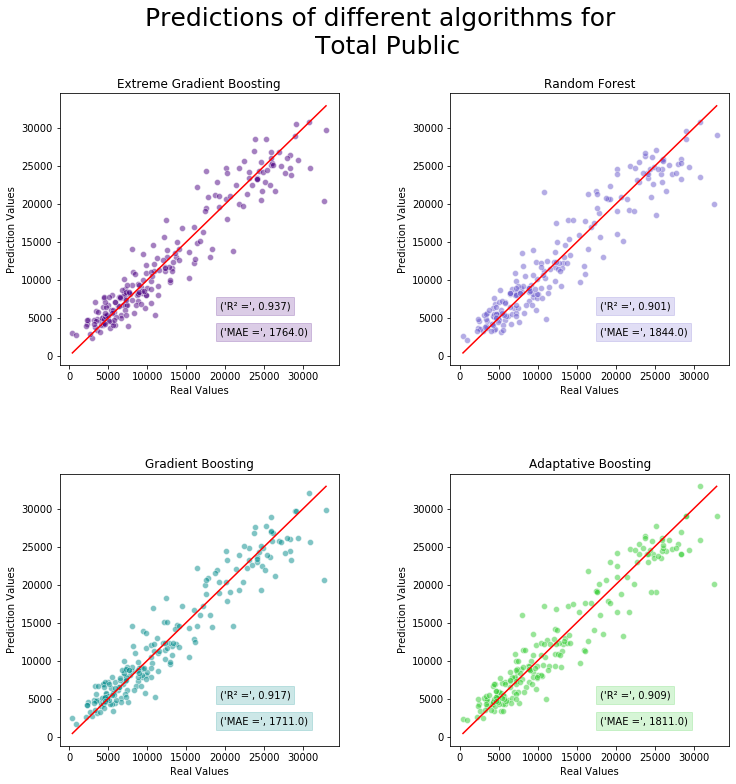

In [0]:
#Scatter plot of the predictions and real values for all the models.
fig1 = plt.subplots(ncols=2, nrows=2, figsize=[12,12])
fig1 = plt.subplots_adjust(hspace=0.4, wspace= 0.4)
fig1 = plt.suptitle("Predictions of different algorithms for \n Total Public", size=25)

plt.subplot(2,2,1)
fig1 = sns.scatterplot(x=Y2,y=ypred2XGB, legend = False, alpha = 0.5, color = 'indigo')
fig1 = sns.lineplot(x=Y2, y=Y2, color ='r')
s1 = 'MAE =', round(MAE2_XGB,0),
s2 = 'R² =', round(r2_XGB, 3)
plt.figtext(0.31, 0.60, s = s1, bbox=dict(color='indigo', alpha=0.2))
plt.figtext(0.31, 0.63, s = s2, bbox=dict(color='indigo', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Extreme Gradient Boosting')

plt.subplot(2,2,2)
fig1 = sns.scatterplot(x=Y2,y=ypred2RF, legend = False, alpha = 0.5, color = 'slateblue')
fig1 = sns.lineplot(x=Y2, y=Y2, color ='r')
s1 = 'MAE =', round(MAE2_RF,0),
s2 = 'R² =', round(r2_RF2, 3)
plt.figtext(0.75, 0.60, s = s1, bbox=dict(color='slateblue', alpha=0.2))
plt.figtext(0.75, 0.63, s = s2, bbox=dict(color='slateblue', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Random Forest')

plt.subplot(2,2,3)
fig1 = sns.scatterplot(x=Y2,y=ypred2GBM, legend = False, alpha = 0.5, color = 'darkcyan')
fig1 = sns.lineplot(x=Y2, y=Y2, color ='r')
s1 = 'MAE =', round(MAE2_GBM,0),
s2 = 'R² =', round(r2_GBM2, 3)
plt.figtext(0.31, 0.15, s = s1, bbox=dict(color='darkcyan', alpha=0.2))
plt.figtext(0.31, 0.18, s = s2, bbox=dict(color='darkcyan', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Gradient Boosting')

plt.subplot(2,2,4)
fig1 = sns.scatterplot(x=Y2,y=ypred2ADA,  legend = False, alpha = 0.5, color = 'limegreen')
fig1 = sns.lineplot(x=Y2, y=Y2, color ='r')
s1 = 'MAE =', round(MAE2_ADA,0),
s2 = 'R² =', round(r2_ADA2, 3)
plt.figtext(0.75, 0.15, s = s1, bbox=dict(color='limegreen', alpha=0.2))
plt.figtext(0.75, 0.18, s = s2, bbox=dict(color='limegreen', alpha=0.2))
plt.ylabel('Prediction Values')
plt.xlabel('Real Values')
plt.title('Adaptative Boosting')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


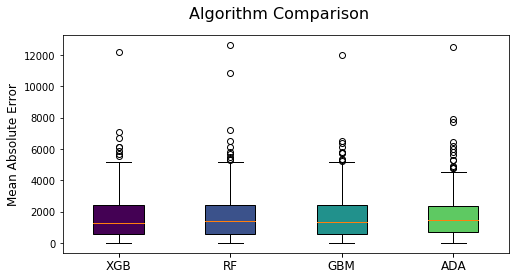

In [0]:
#Errors boxplot comparison for each algorithm

names2 = ['XGB', 'RF', 'GBM', 'ADA']
results2 = [err2XGB, err2RF, err2GBM, err2ADA]
fig = plt.figure(figsize=[8,4])
fig.suptitle('Algorithm Comparison', fontsize=16)
plt.xticks(range(1,5),labels=names2)
ax = fig.add_subplot(111)
bplot = ax.boxplot(results2,patch_artist=True)

cm = plt.cm.get_cmap('viridis')
colors = [cm(val/len(results2)) for val in range(len(results2))]

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(names2, fontsize=12)
ax.set_ylabel("Mean Absolute Error", fontsize=12)
plt.show()


#4º -  Interpreting the best model

From all the results above, we can conclude that the XGB and GBM were the best models for predicting total and paying public. They performed very similarly and obtained the lower errors. 

In this section, we will use the feature_importances_ function to get the most influencial features in predicting the public. Also, we will compare the differences for total and paying public.

### a) Extreme Gradient Boosting Model

This section compared the important features from the XGB model for both scenarios.

In [0]:
#Getting the TOP 20 important features from XGB model for predicting TOTAL PUBLIC
importances = XGB.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 20 Important Features for XGB total public prediction \n")
names=[]
for f in range(20):
    print("%d. %s (%f)" % (f + 1, df_features.columns[indices[f]], importances[indices[f]]))
    names.append(indices[f])

Top 20 Important Features for XGB total public prediction 

1. D-2 (0.790519)
2. Phase_Semifinal (0.015136)
3. Rain (0.014471)
4. D-4 (0.012225)
5. Temp (0.011619)
6. D-3 (0.011426)
7. Hour_19:30:00 (0.010260)
8. WeekDay_Wednesday (0.009515)
9. D-5 (0.008841)
10. Hour_17:00:00 (0.008839)
11. Lineup_Reserve (0.008606)
12. Lineup_Mostly titular (0.007567)
13. WeekDay_Monday (0.006206)
14. Hour_21:00:00 (0.005865)
15. D-6 (0.005593)
16. Phase_Qualifying (0.005059)
17. Hour_11:00:00 (0.004948)
18. Champ_Campeonato Brasileiro (0.004860)
19. Attrat_Very unattractive (0.004776)
20. Attrat_Unattractive (0.004420)


In [0]:
#Getting the TOP 20 important features from XGB model for predicting PAYING PUBLIC
importances = XGB2.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 20 Important Features for XGB paying public prediction \n")
names=[]
for f in range(20):
    print("%d. %s (%f)" % (f + 1, df_features.columns[indices[f]], importances[indices[f]]))
    names.append(indices[f])

Top 20 Important Features for XGB paying public prediction 

1. D-2 (0.574942)
2. Champ_Campeonato Brasileiro (0.093354)
3. Phase_Qualifying (0.036703)
4. D-4 (0.035545)
5. Champ_Copa Libertadores (0.030055)
6. D-3 (0.015804)
7. WeekDay_Saturday (0.013831)
8. Hour_18:30:00 (0.013635)
9. Phase_Semifinal (0.012309)
10. Attrat_Attractive (0.011908)
11. Hour_22:00:00 (0.011764)
12. Phase_Group (0.011698)
13. Hour_11:00:00 (0.011412)
14. D-5 (0.011208)
15. Hour_21:30:00 (0.010533)
16. Lineup_Reserve (0.009996)
17. Rain (0.008401)
18. Champ_Recopa Sul Americana (0.008309)
19. Hour_20:30:00 (0.008226)
20. D-6 (0.008172)


## b) Gradient Boosting Model

This section compared the important features from the GBM model for both scenarios.

In [0]:
#Getting the TOP 20 important features from GBM model for predicting TOTAL PUBLIC
importances = GBM.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 20 Important Features for GBM total public prediction \n")
names=[]
for f in range(20):
    print("%d. %s (%f)" % (f + 1, df_features.columns[indices[f]], importances[indices[f]]))
    names.append(indices[f])

Top 20 Important Features for GBM total public prediction 

1. D-2 (0.946184)
2. Temp (0.011491)
3. D-4 (0.008846)
4. D-5 (0.007887)
5. Rain (0.006899)
6. D-3 (0.004319)
7. D-6 (0.003617)
8. Hour_17:00:00 (0.001467)
9. Hour_11:00:00 (0.001074)
10. WeekDay_Wednesday (0.000675)
11. Lineup_Reserve (0.000664)
12. Hour_21:00:00 (0.000583)
13. WeekDay_Monday (0.000500)
14. Hour_18:30:00 (0.000495)
15. Lineup_Mixt (0.000479)
16. Phase_Semifinal (0.000470)
17. Hour_19:30:00 (0.000445)
18. Phase_Quarterfinal (0.000433)
19. WeekDay_Saturday (0.000363)
20. WeekDay_Sunday (0.000299)


In [0]:
#Getting the TOP 20 important features from GBM model for predicting PAYING PUBLIC
importances = GBM2.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 20 Important Features for GBM paying public prediction \n")
names=[]
for f in range(20):
    print("%d. %s (%f)" % (f + 1, df_features.columns[indices[f]], importances[indices[f]]))
    names.append(indices[f])

Top 20 Important Features for GBM paying public prediction 

1. D-2 (0.917209)
2. D-4 (0.018783)
3. Champ_Campeonato Brasileiro (0.011828)
4. Hour_11:00:00 (0.006239)
5. D-5 (0.006196)
6. D-6 (0.004750)
7. D-3 (0.004529)
8. Phase_Qualifying (0.004220)
9. Phase_Semifinal (0.003577)
10. Rain (0.003474)
11. Temp (0.003319)
12. Hour_22:00:00 (0.002999)
13. Hour_18:30:00 (0.002019)
14. Hour_16:00:00 (0.001578)
15. Phase_Group (0.001436)
16. Hour_21:30:00 (0.000987)
17. Champ_Recopa Sul Americana (0.000979)
18. Lineup_Mixt (0.000914)
19. Champ_Copa Libertadores (0.000867)
20. Lineup_Reserve (0.000729)
